# INTRODUCTION

The selected dataset for the purpose of this project is the TMDB movie. This dataset contains information like budget, revenue,
cast, title, director, genres, votes etc. of the movies listed on TMDB.

For this analysis, I will be answering these questions:
- How many movies have adjusted budget greater or lesser than average adjusted budget?
- How many movies have adjusted revenue greater or lesser than average adjusted revenue?
- What is the modal popularity category?
- What category of vote count does each movie fall to?
- What is the yearly trend of the movies count? 
- How is the revenue generated by each vote bin category?

In [103]:
#import all the necessary libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# DATA WRANGLING

In [104]:
#import the data
df = pd.read_csv("C:/Users/fasasio/OneDrive - Access Bank PLC/Downloads/tmdb-movies.csv")

In [105]:
#take a quick glance at the data
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [106]:
#get the number of rows and columns in the dataset
df.shape

(10866, 21)

The dataset has 21 columns and 10,866 rows

In [107]:
#see the summary information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

8 columns contain missing values and release_date is not in the right data type

In [108]:
#see summary statistics of the numeric data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [109]:
#check for duplicates
df.duplicated().value_counts()

False    10865
True         1
dtype: int64

The dataset also contain one duplicate row which needs to be removed.

In [110]:
#change the datatype of release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

In [111]:
#drop the duplicate row
df.drop_duplicates(inplace=True)

In [112]:
#show all the columns 
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [113]:
#dropping columns that are not relevant to answer the questions
col_to_drop = ['budget', 'revenue', 'homepage', 'tagline','overview', 'genres', 'production_companies','cast'
              ,'keywords']

df.drop(col_to_drop, axis = 1, inplace = True)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10865 non-null  int64         
 1   imdb_id         10855 non-null  object        
 2   popularity      10865 non-null  float64       
 3   original_title  10865 non-null  object        
 4   director        10821 non-null  object        
 5   runtime         10865 non-null  int64         
 6   release_date    10865 non-null  datetime64[ns]
 7   vote_count      10865 non-null  int64         
 8   vote_average    10865 non-null  float64       
 9   release_year    10865 non-null  int64         
 10  budget_adj      10865 non-null  float64       
 11  revenue_adj     10865 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(4), object(3)
memory usage: 1.1+ MB


# EXPLORATORY DATA ANALYSIS

1. Assess the number of movies that are above/below the average budget

In [115]:
#define a function that shows the number of movies below or above average of any selected numeric features
def var_category(x):
    avg_val = df[x].mean()
    df_above = len(df[df[x] >= avg_val])
    df_below = len(df[df[x] < avg_val])
    print('Above: ',round(df_above/ (df_above + df_below),2))
    print('Below: ',round(df_below/ (df_above + df_below),2))
    plt.bar(["Above Average", "Below Average"],[df_above,df_below])

Above:  0.27
Below:  0.73


Text(0, 0.5, 'Movies Count')

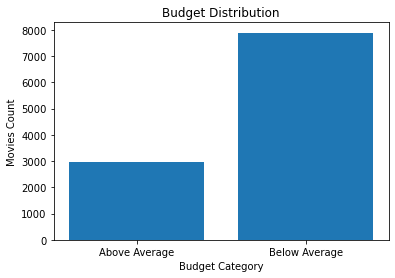

In [116]:
#call the var_category function for budget_adj 
var_category('budget_adj')
plt.title("Budget Distribution")
plt.xlabel('Budget Category')
plt.ylabel('Movies Count')

The chart above shows that 73% of movies actually have an adjusted budget below the average budget.

2. Assess the number of movies that are above/below the average revenue

Above:  0.21
Below:  0.79


Text(0, 0.5, 'Movies Count')

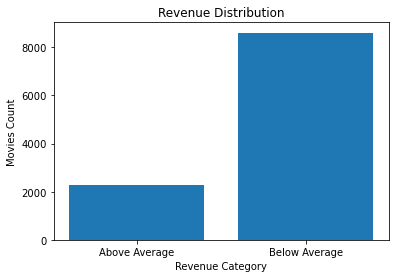

In [117]:
#call the var_category function for revenue_adj 
var_category('revenue_adj')
plt.title("Revenue Distribution")
plt.xlabel('Revenue Category')
plt.ylabel('Movies Count')

The chart above shows that 79% of movies actually have an adjusted revenue below the average revenue.

3. Show count of customers for popularity

(0, 5]      0.992177
(5, 10]     0.006811
(10, 40]    0.001012
Name: popularity, dtype: float64


Text(0.5, 0, 'Movies Count')

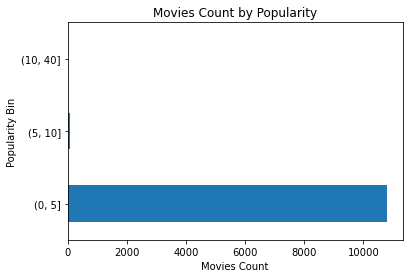

In [118]:
#group the popularity to bins 
bins_list = [0,5,10,40]

print(pd.cut(df['popularity'], bins = bins_list).value_counts()/len(df['popularity']))
pd.cut(df['popularity'], bins = bins_list).value_counts().plot(kind= 'barh')
plt.title('Movies Count by Popularity')
plt.ylabel('Popularity Bin')
plt.xlabel('Movies Count')

About 99% of the movies have a popularity between 0-5, making 0-5 the modal popularity bin

4. Assess the vote_count

In [119]:
df['vote_category'] = df['vote_count'].apply(lambda x: 'Less than 1000' if x < 1000 else ('1000-5000' if x<=5000 else ('Above 5000')))
df['vote_category'].value_counts()

Less than 1000    10301
1000-5000           540
Above 5000           24
Name: vote_category, dtype: int64

Text(0.5, 0, 'Movies Count')

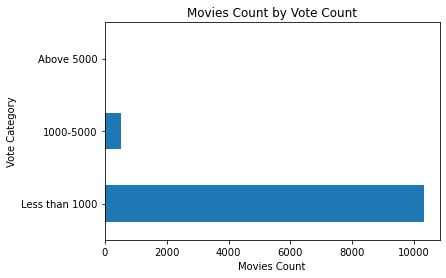

In [120]:
%matplotlib inline
df['vote_category'].value_counts().plot(kind='barh')
plt.title('Movies Count by Vote Count')
plt.ylabel('Vote Category')
plt.xlabel('Movies Count')

10301 movies falls into the Below 1000 vote category, making 94% of the total movies

5. show yearly trend of movies count 

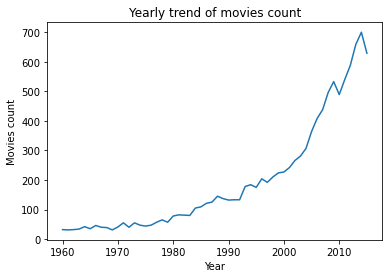

In [121]:
plt.plot(df['release_year'].value_counts().sort_index())
plt.title('Yearly trend of movies count')
plt.xlabel('Year')
plt.ylabel('Movies count')
plt.show()

 The above graph shows that the number of movies is averagely on increase.

6. Investigate the revenue of the modal vote count category

Text(0, 0.5, 'Vote Count Category')

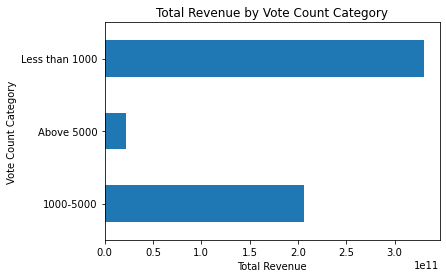

In [122]:
df.groupby('vote_category')['revenue_adj'].sum().plot(kind='barh')
plt.title('Total Revenue by Vote Count Category')
plt.xlabel('Total Revenue')
plt.ylabel('Vote Count Category')

The Less than 1000  category generates more revenue than other categories 

# CONCLUSION

The analysis above reveals some interesting facts about the number of movies that falls into each budget_adj and revenue_adj category, the modal popularity bin and revenue generated by vote count category. 
Some of the limitations to this analysis include:
- Not enough business knowledge to know which exact variables should be analysed.
- Insufficient data to know  the variables that affect the popularity and vote count of movies